## IMAGE RECOGNITION IN AMERICAN SIGN LANGUAGE

In [1]:

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from IPython.display import display
import seaborn as sns
#import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report , accuracy_score
#from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from sklearn.impute import SimpleImputer

# specifically for cnn
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 

import tensorflow as tf
import random as rn

Using TensorFlow backend.


#### 1- Load Data 

In [2]:
train=pd.read_csv("sign_mnist_train.csv")
test=pd.read_csv("sign_mnist_test.csv")
df=train.copy()
df_test=test.copy()

#### 2- Data Dimensions

In [3]:
display(df.head())
train_labels = train['label'].values
unique_val = np.array(train_labels)
np.unique(unique_val)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [4]:
print("Original Data-",df.shape)
print("Test Data-",df_test.shape)
print("Value Counts",df['label'].value_counts())

Original Data- (27455, 785)
Test Data- (7172, 785)
Value Counts 17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64


#### 3-Visualize Data

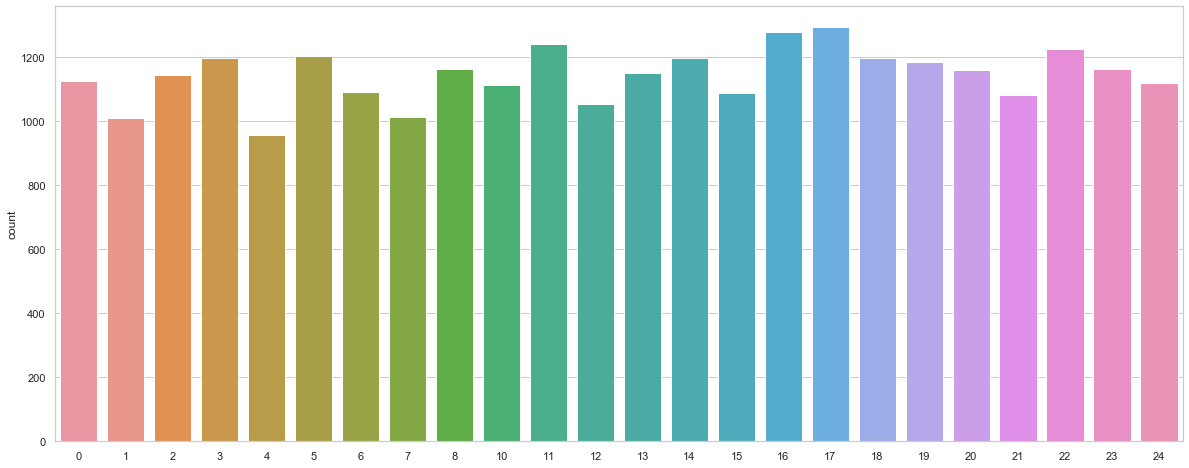

In [5]:
plt.figure(figsize = (18,8))
sns.countplot(x=train_labels)

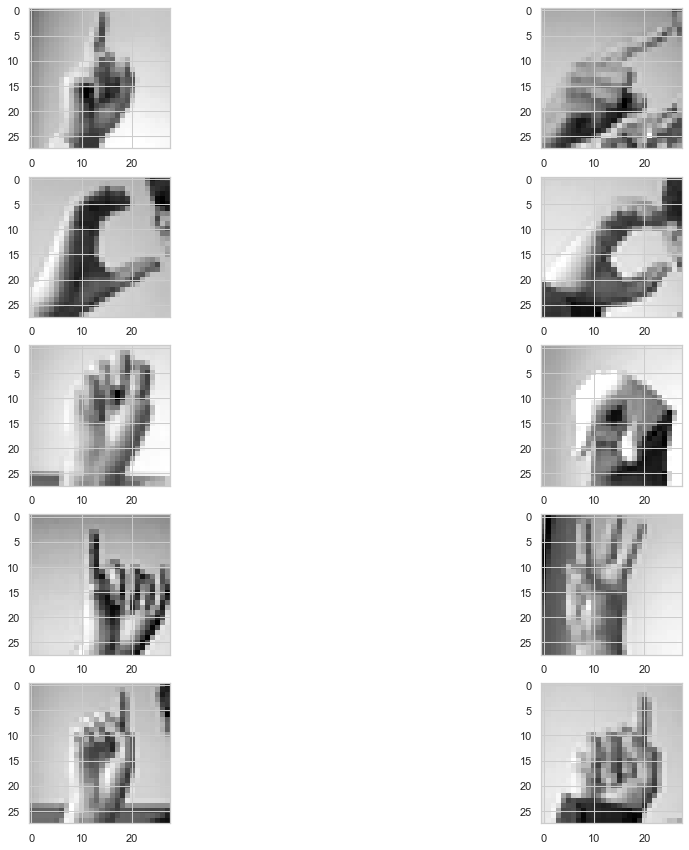

In [6]:
## Plot 10 images from data
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
count=0
for i in range(5):
    for j in range (2):
        ax[i,j].imshow(df.drop('label',axis=1).values[count].reshape(28,28),cmap='gray')
        count+=1

#### 4- Data Preprocessing

In [7]:
## Creating label and images array 
X=df.drop('label',axis=1).values
Y=df['label'].values
## Creating label and images array for test data
X_test = df_test.drop('label',axis=1).values
Y_test = df_test['label'].values
# Converting to categorical 
Y=to_categorical(Y)
Y_test = to_categorical(Y_test)
print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
x_train

array([[ 97,  65, 128, ...,  90,  91,  91],
       [215, 216, 217, ..., 124,  23, 140],
       [144, 145, 146, ..., 134, 101,  72],
       ...,
       [193, 194, 195, ..., 121, 120, 117],
       [200, 201, 199, ..., 127,  71,  60],
       [114, 123, 132, ...,  50,  12,  96]], dtype=int64)

In [9]:
# Normalizing data
x_train=x_train/255  
x_test=x_test/255
X_test=X_test/255
x_train

array([[0.38039216, 0.25490196, 0.50196078, ..., 0.35294118, 0.35686275,
        0.35686275],
       [0.84313725, 0.84705882, 0.85098039, ..., 0.48627451, 0.09019608,
        0.54901961],
       [0.56470588, 0.56862745, 0.57254902, ..., 0.5254902 , 0.39607843,
        0.28235294],
       ...,
       [0.75686275, 0.76078431, 0.76470588, ..., 0.4745098 , 0.47058824,
        0.45882353],
       [0.78431373, 0.78823529, 0.78039216, ..., 0.49803922, 0.27843137,
        0.23529412],
       [0.44705882, 0.48235294, 0.51764706, ..., 0.19607843, 0.04705882,
        0.37647059]])

In [10]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
x_train.shape
#X_test.shape

(21964, 28, 28, 1)

### 5- Data Augmentation

In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

### 6-Training the Model

In [12]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same',data_format="channels_last",activation='relu',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same',data_format="channels_last",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format="channels_last"))
model.add(Dropout(0.20))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same',data_format="channels_last",activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same',data_format="channels_last",activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format="channels_last"))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(Dense(y_train.shape[1], activation='softmax'))
batch_size=64
epochs=13
model.compile(optimizer=RMSprop(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)       

In [13]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/13
343/343 [==============================] - 153s 446ms/step - loss: 1.1812 - accuracy: 0.6484 - val_loss: 1.8229 - val_accuracy: 0.4866
Epoch 2/13
343/343 [==============================] - 146s 427ms/step - loss: 0.2911 - accuracy: 0.9107 - val_loss: 0.0461 - val_accuracy: 0.9924
Epoch 3/13
343/343 [==============================] - 148s 430ms/step - loss: 0.1497 - accuracy: 0.9549 - val_loss: 0.1839 - val_accuracy: 0.9368
Epoch 4/13
343/343 [==============================] - 149s 433ms/step - loss: 0.0903 - accuracy: 0.9727 - val_loss: 0.0693 - val_accuracy: 0.9842
Epoch 5/13
343/343 [==============================] - 149s 433ms/step - loss: 0.0679 - accuracy: 0.9795 - val_loss: 0.0060 - val_accuracy: 0.9993
Epoch 6/13
343/343 [==============================] - 263s 767ms/step - loss: 0.0517 - accuracy: 0.9846 - val_loss: 0.0045 - val_accuracy: 0.9991
Epoch 7/13
343/343 [==============================] - 146s 427ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0085 -

### 7- Model Evaluation

In [14]:
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)
image_id=[]
for i in range (len(pred_digits)):
    image_id.append(i+1)
len(image_id)

7172

In [15]:
pred_digits

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [16]:
y_true = np.argmax(Y_test,axis = 1)
y_true

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [17]:

print(classification_report(y_true, pred_digits))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       0.99      1.00      0.99       498
           5       1.00      1.00      1.00       247
           6       1.00      1.00      1.00       348
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       1.00      1.00      1.00       394
          13       1.00      1.00      1.00       291
          14       1.00      1.00      1.00       246
          15       0.99      1.00      1.00       347
          16       1.00      0.99      1.00       164
          17       1.00      1.00      1.00       144
          18       1.00    

In [18]:
model.evaluate(x_test, y_test)

5491/5491 [==============================] - 19s 3ms/step


[0.001052108048171956, 0.9998179078102112]

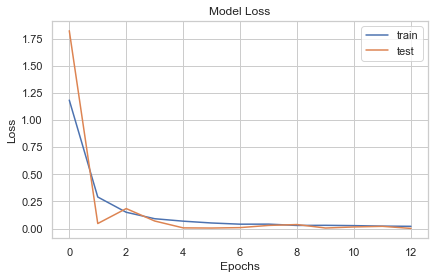

In [19]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

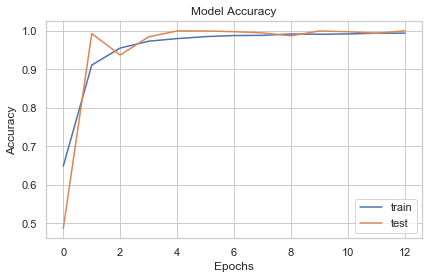

In [20]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [21]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(Y_test)):
    if(np.argmax(Y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==6):
        break

i=0
for i in range(len(Y_test)):
    if(not np.argmax(Y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==6):
        break

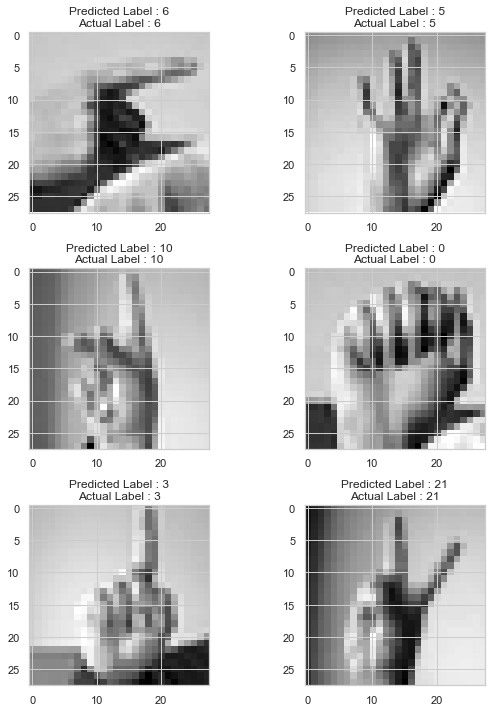

In [22]:

count=0
fig,ax=plt.subplots(3,2)
fig.set_size_inches(10,10)
for i in range (3):
    for j in range (2):
        ax[i,j].imshow(X_test[prop_class[count]].reshape(28,28),cmap='gray')
        ax[i,j].set_title("Predicted Label : "+str(pred_digits[prop_class[count]])+"\n"+"Actual Label : "+str(np.argmax(Y_test[prop_class[count]])))
        plt.tight_layout()
        count+=1

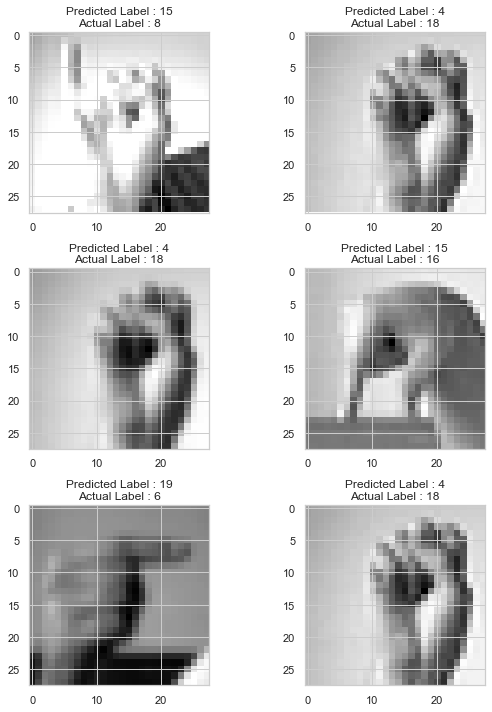

In [23]:
count=0
fig,ax=plt.subplots(3,2)
fig.set_size_inches(10,10)
for i in range(3):
    for j in range(2):
        ax[i,j].imshow(X_test[mis_class[count]].reshape(28,28),cmap='gray')
        ax[i,j].set_title("Predicted Label : "+str(pred_digits[mis_class[count]])+"\n"+"Actual Label : "+str(np.argmax(Y_test[mis_class[count]])))
        plt.tight_layout()
        count+=1

### 8- Model Performance on unseen data

In [24]:
from PIL import Image
img = Image.open("imageI.png")

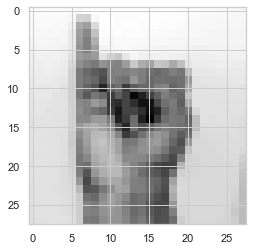

In [25]:
plt.imshow(img, cmap="gray")

In [26]:
img_arr = np.array(img, dtype="int64") 
print(img_arr)
img_arr2 = img_arr.reshape(1,28,28,1)
img_arr2 = img_arr2/255

[[184 184 184 185 184 183 183 185 186 185 185 185 185 185 185 185 185 186
  185 184 184 184 183 183 182 183 182 181]
 [183 183 183 183 183 181 161 160 182 185 185 184 184 184 185 185 185 185
  184 184 183 183 182 182 182 182 181 182]
 [182 183 183 182 182 177 139 133 166 185 185 184 185 185 184 184 185 184
  184 183 182 182 182 182 181 181 181 181]
 [182 182 182 182 181 174 133 121 152 184 184 185 184 184 184 183 183 183
  183 182 182 182 181 180 180 180 180 180]
 [180 181 181 180 180 174 130 116 142 183 182 183 183 183 183 182 182 182
  181 181 181 180 180 180 180 180 180 180]
 [179 180 180 179 178 173 127 115 133 179 181 182 183 182 181 180 180 179
  180 180 179 178 178 179 179 179 179 179]
 [177 178 178 178 177 170 131 126 130 170 161 155 172 181 178 177 178 178
  177 177 176 176 177 177 178 178 178 178]
 [177 177 178 177 175 165 125 117 112 127 119 118 132 156 140 135 155 152
  139 151 172 175 175 176 177 177 176 175]
 [176 176 177 176 174 161 113 103  96  91 115 117 115 119 115 10

In [27]:
can_pred = model.predict(img_arr2)

In [28]:
can_pred2 = np.argmax(can_pred,axis=1)

Predicted label = 8, Actual Label = 8

In [29]:
can_pred2

array([8], dtype=int64)